## Imports

In [32]:
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install yfinance


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
plt.rcParams["figure.figsize"] = (15,5.5)
warnings.filterwarnings('ignore')

## Dataset

In [72]:
df = pd.read_csv('/content/SALASAR.NS.csv')

In [73]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-18,1.662,1.7205,1.6620,1.6795,1.621397,1597300
1,2019-06-19,1.665,1.7195,1.5580,1.5735,1.519064,1759600
2,2019-06-20,1.553,1.5890,1.5000,1.5095,1.457278,1970000
3,2019-06-21,1.481,1.5400,1.4800,1.4845,1.433143,953000
4,2019-06-24,1.490,1.5165,1.4255,1.4600,1.409491,813100


In [74]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1231,2024-06-11,19.969999,20.200001,19.650000,20.030001,20.030001,5975230
1232,2024-06-12,19.809999,20.410000,19.809999,19.950001,19.950001,9542978
1233,2024-06-13,19.950001,20.160000,19.920000,19.940001,19.940001,4684966
1234,2024-06-14,20.030001,20.090000,19.799999,19.830000,19.830000,8613482
1235,2024-06-18,20.000000,20.700001,19.930000,20.059999,20.059999,10498057


## Data preparation

In [75]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,6.496345,6.644359,6.329812,6.474399,6.452727,6.791327e+06
std,5.799833,5.909747,5.660564,5.772905,5.779868,9.951840e+06
min,0.740000,0.755000,0.702500,0.715000,0.704956,1.611000e+05
25%,1.939875,1.996125,1.888125,1.952250,1.933056,2.154759e+06
50%,5.239000,5.368000,5.100000,5.214500,5.188748,4.105525e+06
75%,8.790000,9.085000,8.590000,8.767500,8.750640,7.215475e+06
max,33.950001,33.950001,33.950001,33.950001,33.950001,9.833410e+07


In [76]:
df = df.iloc[::-1]

In [77]:
df.reset_index(inplace=True)

In [78]:
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,1235,2024-06-18,20.000000,20.700001,19.930000,20.059999,20.059999,10498057
1,1234,2024-06-14,20.030001,20.090000,19.799999,19.830000,19.830000,8613482
2,1233,2024-06-13,19.950001,20.160000,19.920000,19.940001,19.940001,4684966
3,1232,2024-06-12,19.809999,20.410000,19.809999,19.950001,19.950001,9542978
4,1231,2024-06-11,19.969999,20.200001,19.650000,20.030001,20.030001,5975230


In [79]:
df.drop('index', axis=1, inplace=True)

In [80]:
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-06-18,20.000000,20.700001,19.930000,20.059999,20.059999,10498057
1,2024-06-14,20.030001,20.090000,19.799999,19.830000,19.830000,8613482
2,2024-06-13,19.950001,20.160000,19.920000,19.940001,19.940001,4684966
3,2024-06-12,19.809999,20.410000,19.809999,19.950001,19.950001,9542978
4,2024-06-11,19.969999,20.200001,19.650000,20.030001,20.030001,5975230
5,2024-06-10,20.790001,20.790001,19.959999,20.000000,20.000000,3977191
6,2024-06-07,20.000000,20.350000,19.900000,20.100000,20.100000,3549484
7,2024-06-06,19.900000,20.150000,19.650000,20.150000,20.150000,3895394
8,2024-06-05,19.049999,19.600000,18.100000,19.200001,19.200001,6679282
9,2024-06-04,20.350000,20.350000,19.049999,19.049999,19.049999,6123017


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [82]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,6.496345,6.644359,6.329812,6.474399,6.452727,6.791327e+06
std,5.799833,5.909747,5.660564,5.772905,5.779868,9.951840e+06
min,0.740000,0.755000,0.702500,0.715000,0.704956,1.611000e+05
25%,1.939875,1.996125,1.888125,1.952250,1.933056,2.154759e+06
50%,5.239000,5.368000,5.100000,5.214500,5.188748,4.105525e+06
75%,8.790000,9.085000,8.590000,8.767500,8.750640,7.215475e+06
max,33.950001,33.950001,33.950001,33.950001,33.950001,9.833410e+07


In [83]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [84]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-06-18,20.000000,20.700001,19.930000,20.059999,20.059999,10498057
1,2024-06-14,20.030001,20.090000,19.799999,19.830000,19.830000,8613482
2,2024-06-13,19.950001,20.160000,19.920000,19.940001,19.940001,4684966
3,2024-06-12,19.809999,20.410000,19.809999,19.950001,19.950001,9542978
4,2024-06-11,19.969999,20.200001,19.650000,20.030001,20.030001,5975230


## Exploratory Data Analysis (EDA)  



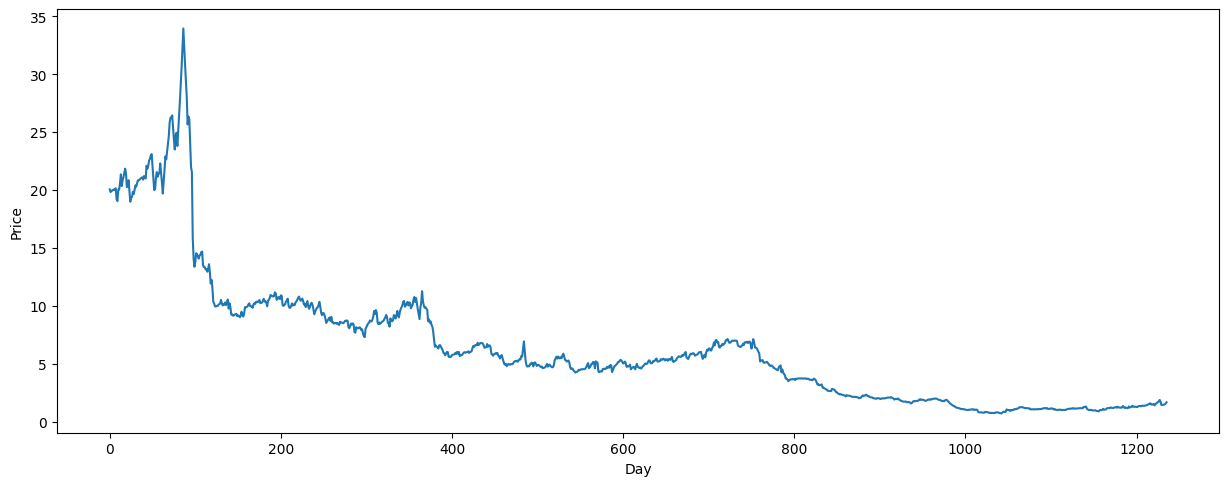

In [85]:
plt.plot(df.Close)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [86]:
print(df.shape)

(1236, 7)


In [87]:
mean_average_100 = df.Close.rolling(100).mean()
mean_average_100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1231    1.260665
1232    1.263870
1233    1.267330
1234    1.271265
1235    1.276355
Name: Close, Length: 1236, dtype: float64

In [88]:
print(df.head(10))

         Date       Open       High        Low      Close  Adj Close    Volume
0  2024-06-18  20.000000  20.700001  19.930000  20.059999  20.059999  10498057
1  2024-06-14  20.030001  20.090000  19.799999  19.830000  19.830000   8613482
2  2024-06-13  19.950001  20.160000  19.920000  19.940001  19.940001   4684966
3  2024-06-12  19.809999  20.410000  19.809999  19.950001  19.950001   9542978
4  2024-06-11  19.969999  20.200001  19.650000  20.030001  20.030001   5975230
5  2024-06-10  20.790001  20.790001  19.959999  20.000000  20.000000   3977191
6  2024-06-07  20.000000  20.350000  19.900000  20.100000  20.100000   3549484
7  2024-06-06  19.900000  20.150000  19.650000  20.150000  20.150000   3895394
8  2024-06-05  19.049999  19.600000  18.100000  19.200001  19.200001   6679282
9  2024-06-04  20.350000  20.350000  19.049999  19.049999  19.049999   6123017


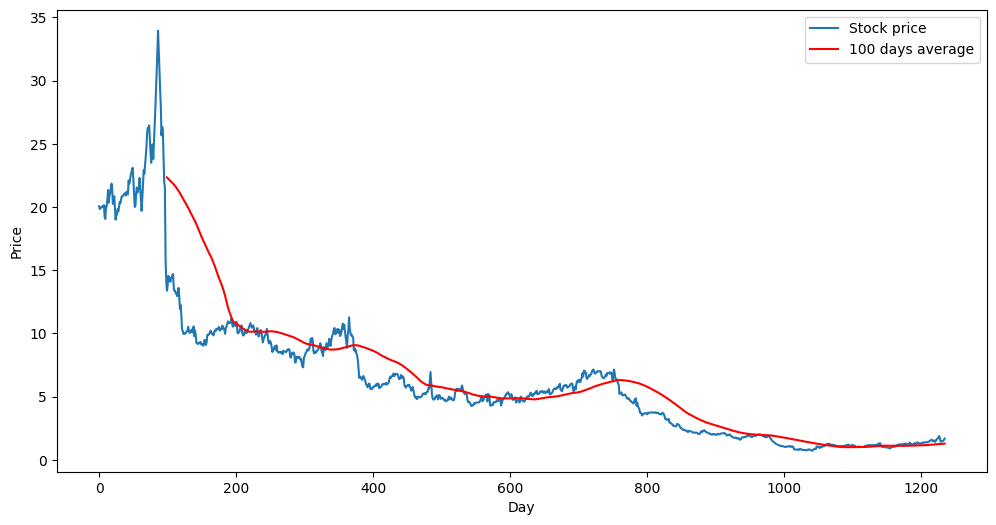

In [89]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, label='Stock price')
plt.plot(mean_average_100, 'r', label='100 days average')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

In [90]:
mean_average_200 = df.Close.rolling(200).mean()
mean_average_200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1231    1.157550
1232    1.161195
1233    1.165028
1234    1.169100
1235    1.173520
Name: Close, Length: 1236, dtype: float64

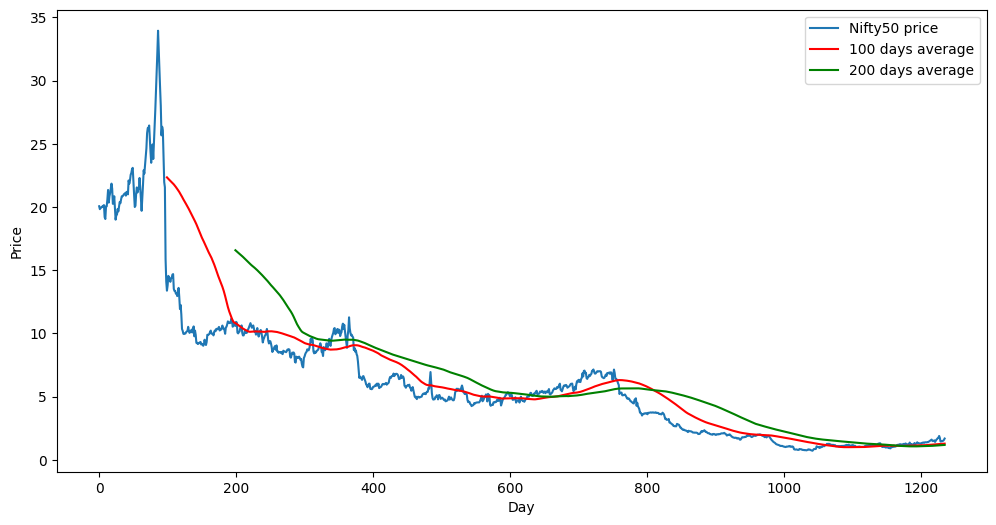

In [91]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, label='Nifty50 price')
plt.plot(mean_average_100, 'r', label='100 days average')
plt.plot(mean_average_200, 'g', label='200 days average')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [92]:
df.shape

(1236, 7)

## Splitting data for training and testing (70/30)

In [93]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(865, 1)
(371, 1)


In [55]:
data_training.head()

,Close
0,21.46
1,21.86
2,21.51
3,21.12
4,20.84


In [94]:
data_testing.head()

,Close
865,2.2375
866,2.2100
867,2.1610
868,2.1520
869,2.1550


In [95]:
scaler = MinMaxScaler(feature_range=(0,1))

In [96]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.5626505 ],
       [0.5554086 ],
       [0.55887216],
       [0.55918703],
       [0.56170596],
       [0.56076133],
       [0.56390999],
       [0.56548433],
       [0.53557205],
       [0.53084899],
       [0.56233563],
       [0.56233563],
       [0.57965331],
       [0.60326829],
       [0.57178165],
       [0.58752497],
       [0.59539663],
       [0.60799129],
       [0.61901161],
       [0.60641699],
       [0.56863299],
       [0.57178165],
       [0.58752497],
       [0.55918703],
       [0.52927469],
       [0.54029501],
       [0.54186934],
       [0.55603833],
       [0.54974101],
       [0.56076133],
       [0.57335599],
       [0.57020729],
       [0.57965331],
       [0.58752497],
       [0.58752497],
       [0.58909931],
       [0.59224797],
       [0.59382227],
       [0.59539663],
       [0.58909931],
       [0.59854533],
       [0.59697097],
       [0.59224797],
       [0.62688328],
       [0.61901161],
       [0.62688328],
       [0.64105223],
       [0.645

In [97]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train

[array([[0.5626505 ],
        [0.5554086 ],
        [0.55887216],
        [0.55918703],
        [0.56170596],
        [0.56076133],
        [0.56390999],
        [0.56548433],
        [0.53557205],
        [0.53084899],
        [0.56233563],
        [0.56233563],
        [0.57965331],
        [0.60326829],
        [0.57178165],
        [0.58752497],
        [0.59539663],
        [0.60799129],
        [0.61901161],
        [0.60641699],
        [0.56863299],
        [0.57178165],
        [0.58752497],
        [0.55918703],
        [0.52927469],
        [0.54029501],
        [0.54186934],
        [0.55603833],
        [0.54974101],
        [0.56076133],
        [0.57335599],
        [0.57020729],
        [0.57965331],
        [0.58752497],
        [0.58752497],
        [0.58909931],
        [0.59224797],
        [0.59382227],
        [0.59539663],
        [0.58909931],
        [0.59854533],
        [0.59697097],
        [0.59224797],
        [0.62688328],
        [0.61901161],
        [0

In [60]:
x_train, y_train = np.array(x_train), np.array(y_train)

## Building & Evaluating Machine learning Model

In [98]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential, load_model

In [100]:
x_train = np.array(x_train)
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))

model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [103]:
y_train = np.array(y_train)
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
24/24 [==============================] - 13s 311ms/step - loss: 0.0083
Epoch 2/50
24/24 [==============================] - 6s 235ms/step - loss: 0.0028
Epoch 3/50
24/24 [==============================] - 8s 336ms/step - loss: 0.0019
Epoch 4/50
24/24 [==============================] - 6s 236ms/step - loss: 0.0015
Epoch 5/50
24/24 [==============================] - 7s 302ms/step - loss: 0.0013
Epoch 6/50
24/24 [==============================] - 6s 237ms/step - loss: 0.0011
Epoch 7/50
24/24 [==============================] - 7s 276ms/step - loss: 0.0014
Epoch 8/50
24/24 [==============================] - 6s 262ms/step - loss: 0.0011
Epoch 9/50
24/24 [==============================] - 6s 257ms/step - loss: 0.0010
Epoch 10/50
24/24 [==============================] - 7s 281ms/step - loss: 9.4013e-04
Epoch 11/50
24/24 [==============================] - 6s 235ms/step - loss: 9.9873e-04
Epoch 12/50
24/24 [==============================] - 7s 307ms/step - loss: 8.3202e-04
Epoch 13/50


In [104]:
model.save('keras_model.h5')

In [105]:
model = load_model('keras_model.h5')

## Prepare testing data

In [106]:
data_testing.head()

,Close
865,2.2375
866,2.2100
867,2.1610
868,2.1520
869,2.1550


In [107]:
data_training.tail()

,Close
860,2.1905
861,2.2975
862,2.2605
863,2.2525
864,2.2555


In [108]:
past_100_days = data_training.tail(100)

In [110]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [111]:
final_df.head()

,Close
0,5.0915
1,5.1260
2,5.1325
3,5.1675
4,5.0820


In [112]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.98293094],
       [0.99067939],
       [0.99213925],
       [1.        ],
       [0.9807973 ],
       [0.95968557],
       [0.93116227],
       [0.92217855],
       [0.93138686],
       [0.92543515],
       [0.90567097],
       [0.8824256 ],
       [0.87725997],
       [0.86266143],
       [0.85659742],
       [0.84334643],
       [0.84020213],
       [0.90308815],
       [0.91858506],
       [0.93161145],
       [0.79876474],
       [0.85266704],
       [0.78832117],
       [0.76720943],
       [0.73733857],
       [0.67658619],
       [0.67535093],
       [0.6572712 ],
       [0.6252667 ],
       [0.64918585],
       [0.65221786],
       [0.66266143],
       [0.66007861],
       [0.66726558],
       [0.66311061],
       [0.66816395],
       [0.64873666],
       [0.67422796],
       [0.67254351],
       [0.67602471],
       [0.6793936 ],
       [0.68062886],
       [0.6762493 ],
       [0.67995508],
       [0.68208871],
       [0.67669848],
       [0.67557552],
       [0.678

In [113]:
input_data.shape

(471, 1)

In [114]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [115]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(371, 100, 1)
(371,)


## Predict testing data

In [116]:
y_predicted = model.predict(x_test)

12/12 [==============================] - 1s 71ms/step


In [117]:
y_predicted.shape

(371, 1)

In [118]:
y_test

array([0.34194273, 0.33576642, 0.32476137, 0.32274003, 0.32341381,
       0.32004492, 0.32184166, 0.32195396, 0.31791129, 0.31476698,
       0.29713644, 0.29713644, 0.2983717 , 0.30993824, 0.33441887,
       0.34991578, 0.33486805, 0.34811903, 0.35036496, 0.3649635 ,
       0.34778214, 0.3334082 , 0.33587872, 0.32476137, 0.31218417,
       0.31162268, 0.31139809, 0.29713644, 0.29567659, 0.2888265 ,
       0.28916339, 0.28422235, 0.29657496, 0.29769792, 0.29410444,
       0.28399775, 0.28074116, 0.2921954 , 0.29253229, 0.28860191,
       0.29657496, 0.29387984, 0.29635036, 0.30376193, 0.30836609,
       0.30769231, 0.30758001, 0.30825379, 0.3174621 , 0.30690623,
       0.29938237, 0.28624368, 0.26883773, 0.28163953, 0.28388546,
       0.27804604, 0.29152162, 0.27467715, 0.26704099, 0.24918585,
       0.24548007, 0.23582257, 0.23346435, 0.22751263, 0.22897249,
       0.23222908, 0.22504211, 0.21516002, 0.22111173, 0.22346996,
       0.21336328, 0.19562044, 0.19764177, 0.21605839, 0.23582

In [119]:
y_predicted

array([[0.3068809 ],
       [0.3051735 ],
       [0.30361575],
       [0.30216628],
       [0.30078647],
       [0.2994555 ],
       [0.2981606 ],
       [0.2969051 ],
       [0.295701  ],
       [0.29455343],
       [0.2934601 ],
       [0.29236987],
       [0.29124367],
       [0.29007402],
       [0.28890502],
       [0.2878486 ],
       [0.28703794],
       [0.28652537],
       [0.2863407 ],
       [0.28648186],
       [0.28695172],
       [0.2876835 ],
       [0.288553  ],
       [0.2894498 ],
       [0.29026556],
       [0.2908941 ],
       [0.2912731 ],
       [0.29138523],
       [0.2912053 ],
       [0.29073176],
       [0.28995958],
       [0.28891653],
       [0.28762814],
       [0.2861994 ],
       [0.28474686],
       [0.28335625],
       [0.28204748],
       [0.28080446],
       [0.27965677],
       [0.27863955],
       [0.27776557],
       [0.2770551 ],
       [0.27651095],
       [0.27612877],
       [0.27591383],
       [0.27587554],
       [0.27600762],
       [0.276

In [120]:
scaler.scale_

array([0.22459293])

In [121]:
scale_factor = 1/scaler.scale_[0]
y_predicted = (y_predicted * scale_factor) + min(data_testing['Close'])
y_test = y_test * scale_factor + min(data_testing['Close'])

## Plot original V/S predicted price

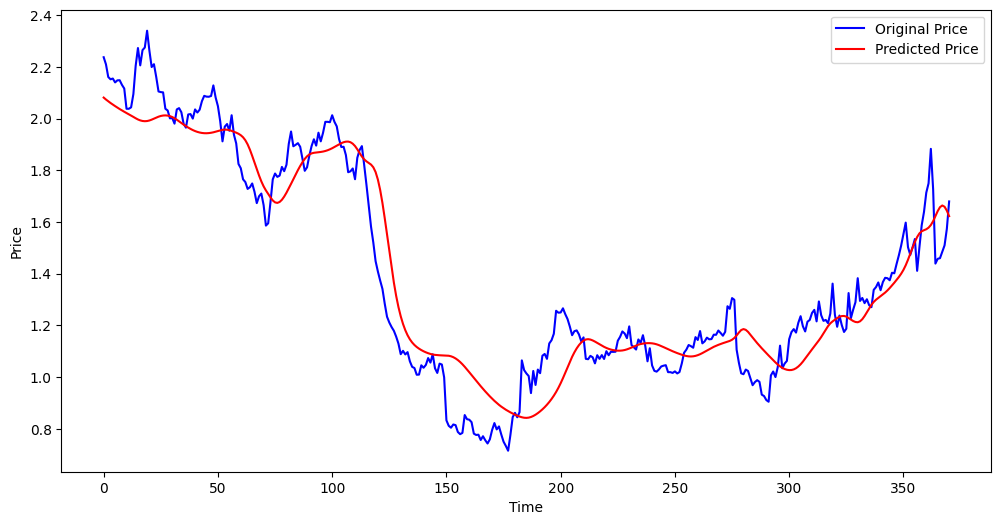

In [122]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()